# Assignment #2
## Part A
Scenario: Conduct a Cluster Analysis

# Load libraries and data

In [214]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pylab as plt

univ_df = pd.read_csv("Universities.csv")
univ_df.set_index("College.Name",inplace=True)
univ_df.head()

,State,Public.vs.Private,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate
College.Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


### Question 1
Rmove all records with missing measurements from the dataset. 

In [215]:
univ_df = univ_df.dropna()
univ_df.head()

,State,Public.vs.Private,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate
College.Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [216]:
univ_df.isna().sum()

State                       0
Public.vs.Private           0
No.appli.rec                0
No.appl.accepted            0
No.new.stud.enrolled        0
Per.new.stud.from.top.10    0
Per.new.stud.from.top.25    0
No.FT.undergrad             0
No.PT.undergrad             0
in.state.tuition            0
out.of.state.tuition        0
room                        0
board                       0
add.fees                    0
estim.book.costs            0
estim.personal.dollar       0
Per.fac.wvs.PHD             0
stud.vs.fac.ratio           0
Graduation.rate             0
dtype: int64

# Question 2:
For all the continuous measurements, run hierarchical clustering using complete linkage and manhattan distance. Normalize the measurements. From the dendrogram, how many clusters seem reasonable for describing the data? Do you think the analysis would change if we used Euclidean distance? 

Normalize the data. 

In [217]:
# nomralize the data
categ_data = univ_df[["State","Public.vs.Private"]]
univ_df = univ_df.drop(columns=["State","Public.vs.Private"])

# change all data to a float
univ_df = univ_df.apply(lambda x:x.astype("float64"))

# normalize the data
univ_df_norm = univ_df.apply(preprocessing.scale,axis=0)

# get the manhattan distance for each record
d_norm = pairwise.pairwise_distances(univ_df_norm,metric="manhattan")

# create the dataframe
pd.DataFrame(d_norm,columns=univ_df.index,index=univ_df.index).head()

College.Name,Alaska Pacific University,University of Alaska Southeast,Birmingham-Southern College,Huntingdon College,Talladega College,University of Alabama at Birmingham,Arkansas College (Lyon College),Hendrix College,John Brown University,Harding University,...,Lawrence University,Ripon College,St. Norbert College,Viterbo College,University of Wisconsin-Stout,Univ. of Wisconsin at Eau Claire,Wisconsin Lutheran College,Alderson-Broaddus College,Marshall University,University of Wyoming
College.Name,,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,0.000000,12.445508,15.770718,7.206503,12.831909,15.359307,12.551887,14.692977,10.067884,16.115621,...,16.818512,14.178000,15.146966,11.093648,17.568212,22.279477,9.331221,9.470686,15.577902,12.201332
University of Alaska Southeast,12.445508,0.000000,18.965707,10.165096,17.304826,17.732527,14.419373,17.983165,12.760456,20.246579,...,19.724813,16.426180,16.596799,12.093355,18.237300,23.914321,8.556977,11.745051,17.254874,14.900730
Birmingham-Southern College,15.770718,18.965707,0.000000,11.174922,17.928378,25.134789,7.980708,7.403590,9.168953,13.381361,...,7.876071,9.643893,7.431284,12.990476,19.568843,23.170863,13.919370,14.128614,20.562648,18.282519
Huntingdon College,7.206503,10.165096,11.174922,0.000000,11.307532,17.917229,8.316145,10.582434,5.699773,14.107435,...,12.464304,9.542582,10.333734,7.402764,16.128075,20.233299,5.817809,7.006625,17.278027,11.571097
Talladega College,12.831909,17.304826,17.928378,11.307532,0.000000,20.291805,13.170375,13.111763,11.066613,11.074495,...,17.457660,18.024180,14.947857,13.590915,15.053572,18.160408,12.789803,11.421909,13.076169,11.520083


Plot the hierarchical clusters. 

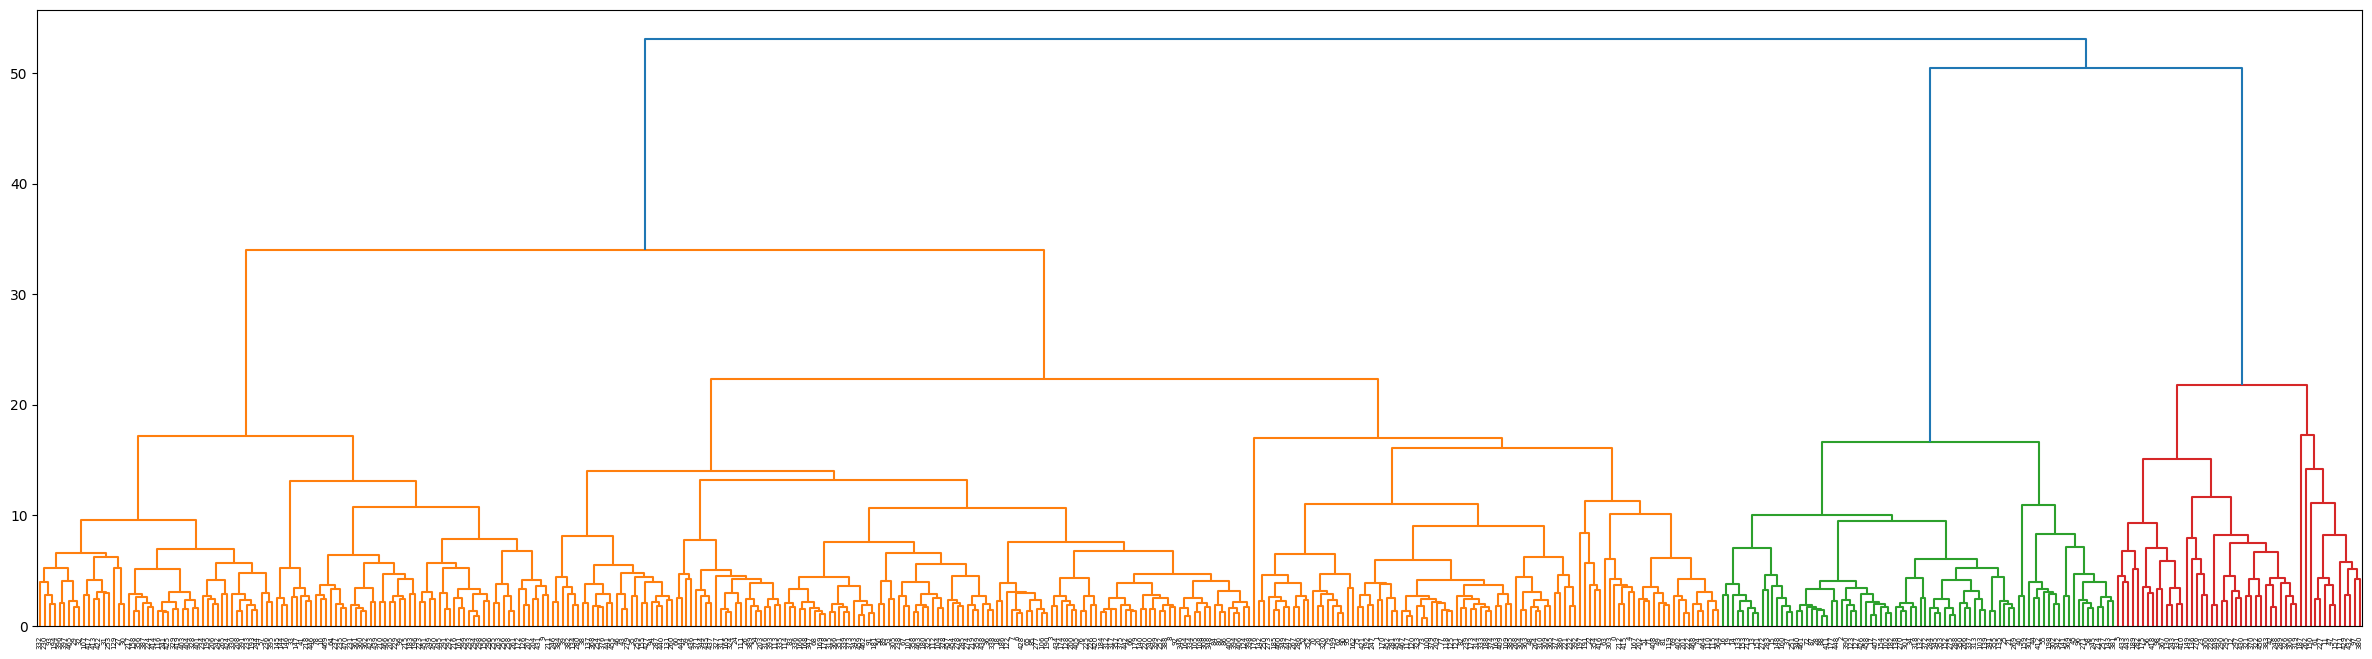

In [218]:
Z = linkage(univ_df_norm,method="ward")

fig = plt.figure(figsize=(30,8))
dendrogram(Z)
plt.show()


# Question 2: Answer
It is hard to say how many clusters seems reasonable, based on the fact that we have so many low level clusters. If we increase our threshold for how many units apart the clusters need to be, we will potentially lose some valuable data. In the plot above, if we specify the units must be 40 units apart, we arrive at 3 clusters. This seems to give us three groups of representative values.  
Because manhattan distances are measured by absolute values and euclidean distances are measured by squared differences, I would say the distances would be different from euclidean to manhattan. 

# Question 3: 
Compare the summary statistics for each cluster and describe each cluster in context. 

We will attempt to assign a cluster number to each record in the dataset so we can analyze the summary data for each cluster. 

In [219]:
# we need to access the different clusters 
clusters = fcluster(Z,3,criterion="maxclust")
univ_df["cluster"] = clusters

univ_summ = univ_df.groupby("cluster").describe()
univ_summ_trans = univ_summ.transpose()
univ_summ_trans.to_csv("summary.csv")

After reviewing the data in an excel spreadsheet, observing primarily mean values to assign summary statistics to each cluster. Here are some generalized rules regarding our clusters:
 
Cluster 1: This cluster contains the lowest average application number out of the three clusters at an average application number of 1,751. It also has the highest acceptance rate of the three clusters at around 72% acceptance rate. These schools have the lowest number of applicants from the top 10 and 25. This cluster has the middle average tuition with out-of-state being slightly more expensive than in-state tuition. These schools also have the lowest percentage of faculty with PHDs at only 67%. 

Cluster 2: Has the highest in-state and out-of-state tuition at an average of $17,340 and also has the highest room and board at $2909 and $2637 respectively. We also have the lowest ratio of students to faculty and the highest percentage of faculty with PHDs. Cluster 2 has the highest graduation rate at 84.5%. Cluster 2 falls in the middle for many features within the data, but another interesting fact is Cluster 2 has the lowest acceptance rate among the three clusters at only a 52% acceptance rate. 

Cluster 3: Cluster 3 contains the highest total number of applications received and accepted. It does not have the higest acceptance rate as that goes to cluster 1, but it does have a greater total number of applicants on average- just over 6x more. It's acceptance rate as a percentage is 67%. The biggest difference between cluster 3 and and clusters 1 and 2 is the in-state vs out-of-state tuition rates. out-of-state tuition for these schools is nearly double what in-state tuition rates are and it also has the highest proportion of personal dollars invested at 21% for out-of-state and 40% for in-state. As far as percentage of faculty with PHDs, clusters 2 and 3 are similar with cluster 2 having a higher percentage. And as far as graduation rate, clusters 1 and 3 are similar, with cluster 3 having a slightly better graduation rate on average. 

# Question 4: 
Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information?

First, we will add our missing categorical data back into our universities dataframe. Once we have added this data, we will attempt to decipher the unique value counts of the categorical data within the clusters to determine if their is any meaning to be extrapolated. 

In [220]:
univ_df[["State","Public.vs.Private"]] = categ_data
univ_df.head()

,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate,cluster,State,Public.vs.Private
College.Name,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0,1,AK,2
University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0,1,AK,1
Birmingham-Southern College,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0,2,AL,2
Huntingdon College,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0,1,AL,2
Talladega College,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0,1,AL,2


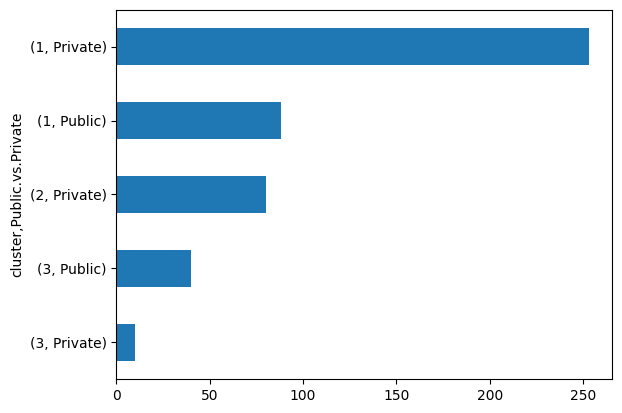

In [252]:
univ_df["Public.vs.Private"] = univ_df["Public.vs.Private"].replace([1,2],["Public","Private"])
pub_vs_pri = univ_df[["cluster","Public.vs.Private"]].groupby("cluster").value_counts().sort_values(ascending=True)
pub_vs_pri.plot(kind="barh")
plt.show()

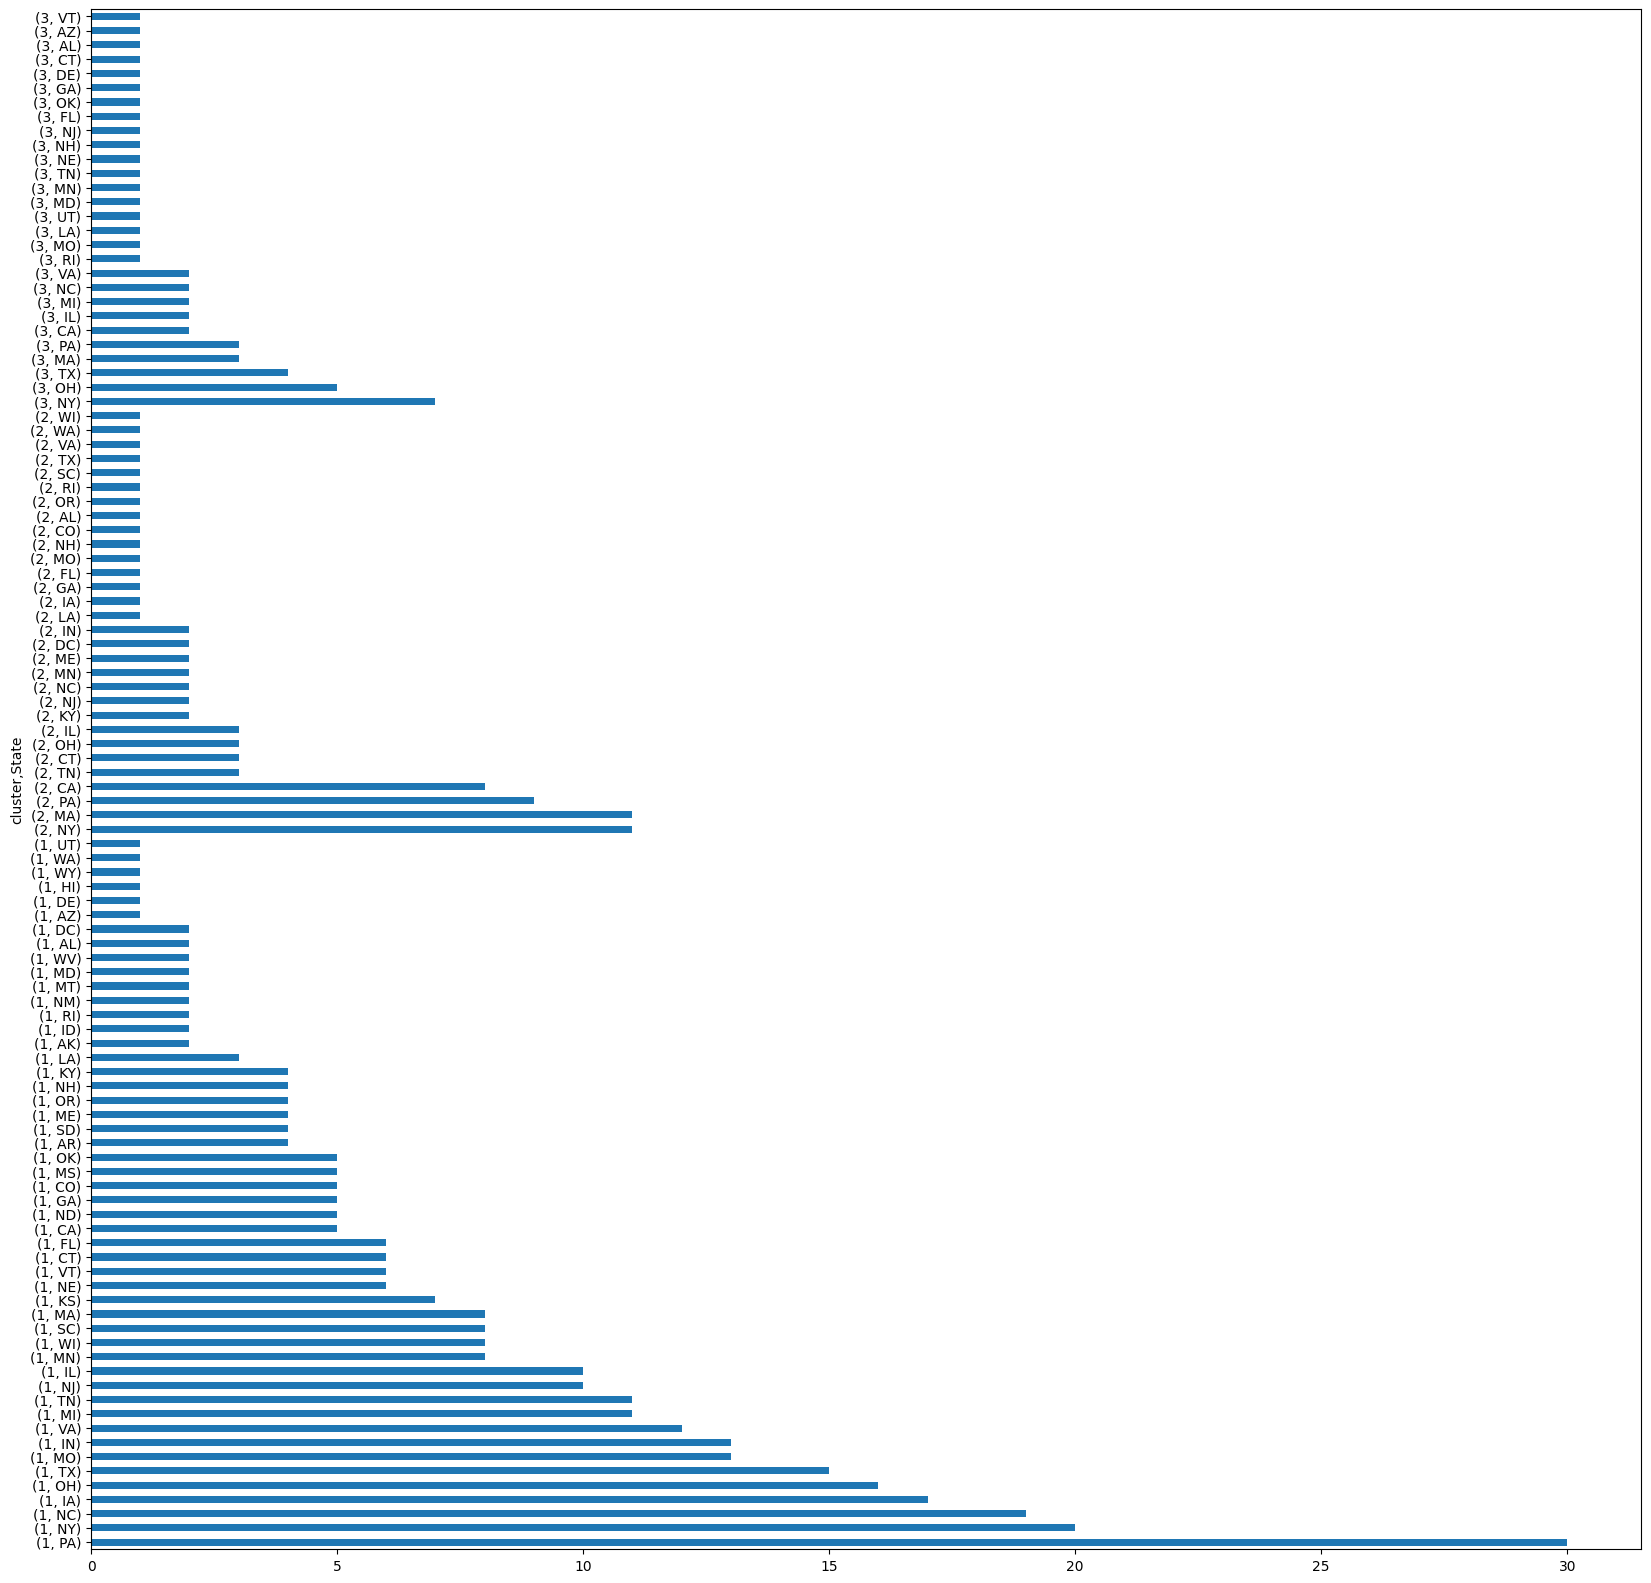

In [254]:
import geopandas as gpd 

state_data = univ_df[["State","cluster"]].groupby("cluster").value_counts()

plt.subplots(figsize=(20,20))
state_data.plot(kind="barh")
plt.show()

We can see from the above plots, there is indeed a relationship between the categorical data and the clusters we discovered through our dendrogram. We do not see quite as much of a relationship between states and the clusters, but there seems to be a relationship between public.vs.private schools and the clusters. For example, cluster 2 is entirely private schools, which are based mostly in NY,MA,PA, and CA. However, the relationship between these variables and the clusters isn't quite as strong in clusters 1 and 3, even though cluster 1 contains by far the largest amount of private schools at a little over 250. 

# Question 5: 
What other external information can explain the contents of some or all of these
clusters?

Having no other data means we are applying practical knowledge to the data, which means at best we can only hypothesize until we are able to gather further data to verify the hypothesis. One possible explanation could be religious schools in group 1. Another contributing factor could be proximity to a large city. Online schooling could also potentially impact the clusters as cluster 1 has little difference between out-of-state and in-state tuition while cluster 3 has a large difference between the two. Lastly, a metric difficult to quantify is prestige. It is difficult not to assume the universities within group 2 are among the Ivy League schools considering they have the highest tuition and are entirely private schools. 

### Assignment #2 
## Part B
Scenario: Conduct a cluster analysis. 
# Question 1:
Apply hierarchical clustering to the data using Manhattan distance to the normalized
measurements. Compare the dendrograms from single linkage and complete linkage,
and look at cluster centroids. Comment on the structure of the clusters and on their
stability.

We will begin by importing the data into a pandas dataframe and scanning for missing data. 

In [268]:
cereal_df = pd.read_csv("Cereals.csv")
cereal_df.set_index("name",inplace=True)
cereal_df = cereal_df.dropna()
cereal_df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [269]:
cereal_df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


Now that we have successfully removed na values, we can go about saving our categorical data into a separate dataframe for safe keeping while we plot our dendrogram for cluster analysis. 

In [273]:
categ_data = cereal_df[["mfr","type"]]
cereal_df = cereal_df.drop(columns=["mfr","type"])
cereal_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


Let's normalize the data. 

In [275]:
cereal_df = cereal_df.apply(lambda x:x.astype("float64"))

cereal_df_norm = cereal_df.apply(preprocessing.scale,axis=0)

d_norm = pairwise.pairwise_distances(cereal_df_norm,metric="manhattan")

pd.DataFrame(d_norm,columns=cereal_df.index,index=cereal_df.index).head()

name,100%_Bran,100%_Natural_Bran,All-Bran,All-Bran_with_Extra_Fiber,Apple_Cinnamon_Cheerios,Apple_Jacks,Basic_4,Bran_Chex,Bran_Flakes,Cap'n'Crunch,...,Special_K,Strawberry_Fruit_Wheats,Total_Corn_Flakes,Total_Raisin_Bran,Total_Whole_Grain,Triples,Trix,Wheat_Chex,Wheaties,Wheaties_Honey_Gold
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,0.000000,21.953302,3.957471,9.211821,21.375108,22.251790,21.868909,16.275398,12.115000,24.887937,...,22.969205,18.430990,25.589716,25.241600,19.980172,21.368802,23.179372,17.931793,18.917964,21.450047
100%_Natural_Bran,21.953302,0.000000,22.756850,28.160581,13.628024,14.247383,13.545414,17.998852,16.833638,16.126107,...,20.629524,15.176502,19.327613,20.704869,16.685676,17.280610,15.296607,17.905311,16.331338,16.019191
All-Bran,3.957471,22.756850,0.000000,10.292822,20.962239,23.055339,20.726190,15.375962,10.510340,23.501935,...,20.877979,18.772598,24.228339,24.585448,18.618795,18.791008,23.739638,15.840566,17.556587,20.550612
All-Bran_with_Extra_Fiber,9.211821,28.160581,10.292822,0.000000,27.339104,26.459070,27.832906,22.239394,15.617055,30.851934,...,25.547379,22.176329,30.167889,31.205597,24.558345,25.946975,29.143369,22.509967,23.496138,27.414044
Apple_Cinnamon_Cheerios,21.375108,13.628024,20.962239,27.339104,0.000000,7.038973,10.477642,7.914692,13.745464,5.932888,...,12.574812,12.667916,14.241250,19.201261,15.022937,10.058565,7.197457,9.408821,9.828482,3.957028


Now that the data is normalized, we can proceed with viewing our two dendrograms and the subsequent centroids: single and complete. 

We will select an arbritrary value of 5 for the max clusters so that we can more fairly assess the usefulness of either method. 

# Single Linkage

Single linkage centroids:
Cluster 1: size 2
Cluster 2: size 3
Cluster 3: size 68
Cluster 4: size 1


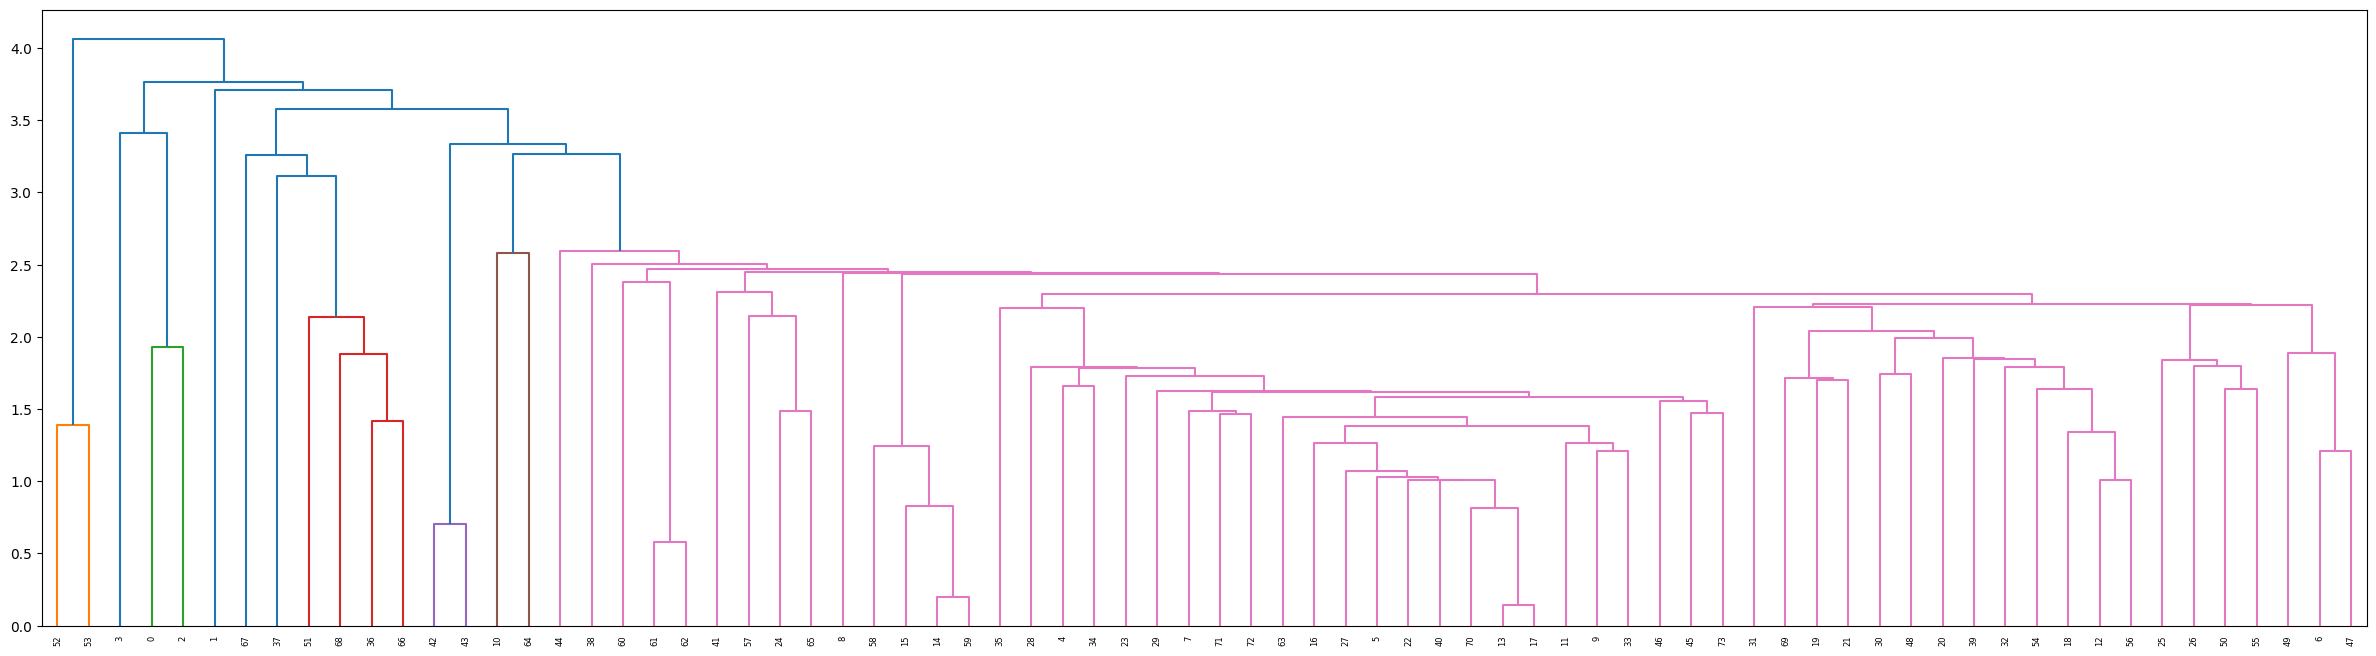

In [286]:
memb = fcluster(linkage(cereal_df_norm,method="single"),5,criterion="maxclust")
centroids = {}
print("Single linkage centroids:")
for key, item in cereal_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print("Cluster {}: size {}".format(key,len(item)))
pd.DataFrame(centroids).transpose().round(2)
Z = linkage(cereal_df_norm,method="single")
plt.figure(figsize=(30,8))
dendrogram(Z)
plt.show()

# Complete Linkage

Complete linkage centroids:
Cluster 1: size 12
Cluster 2: size 49
Cluster 3: size 3
Cluster 4: size 9
Cluster 5: size 1


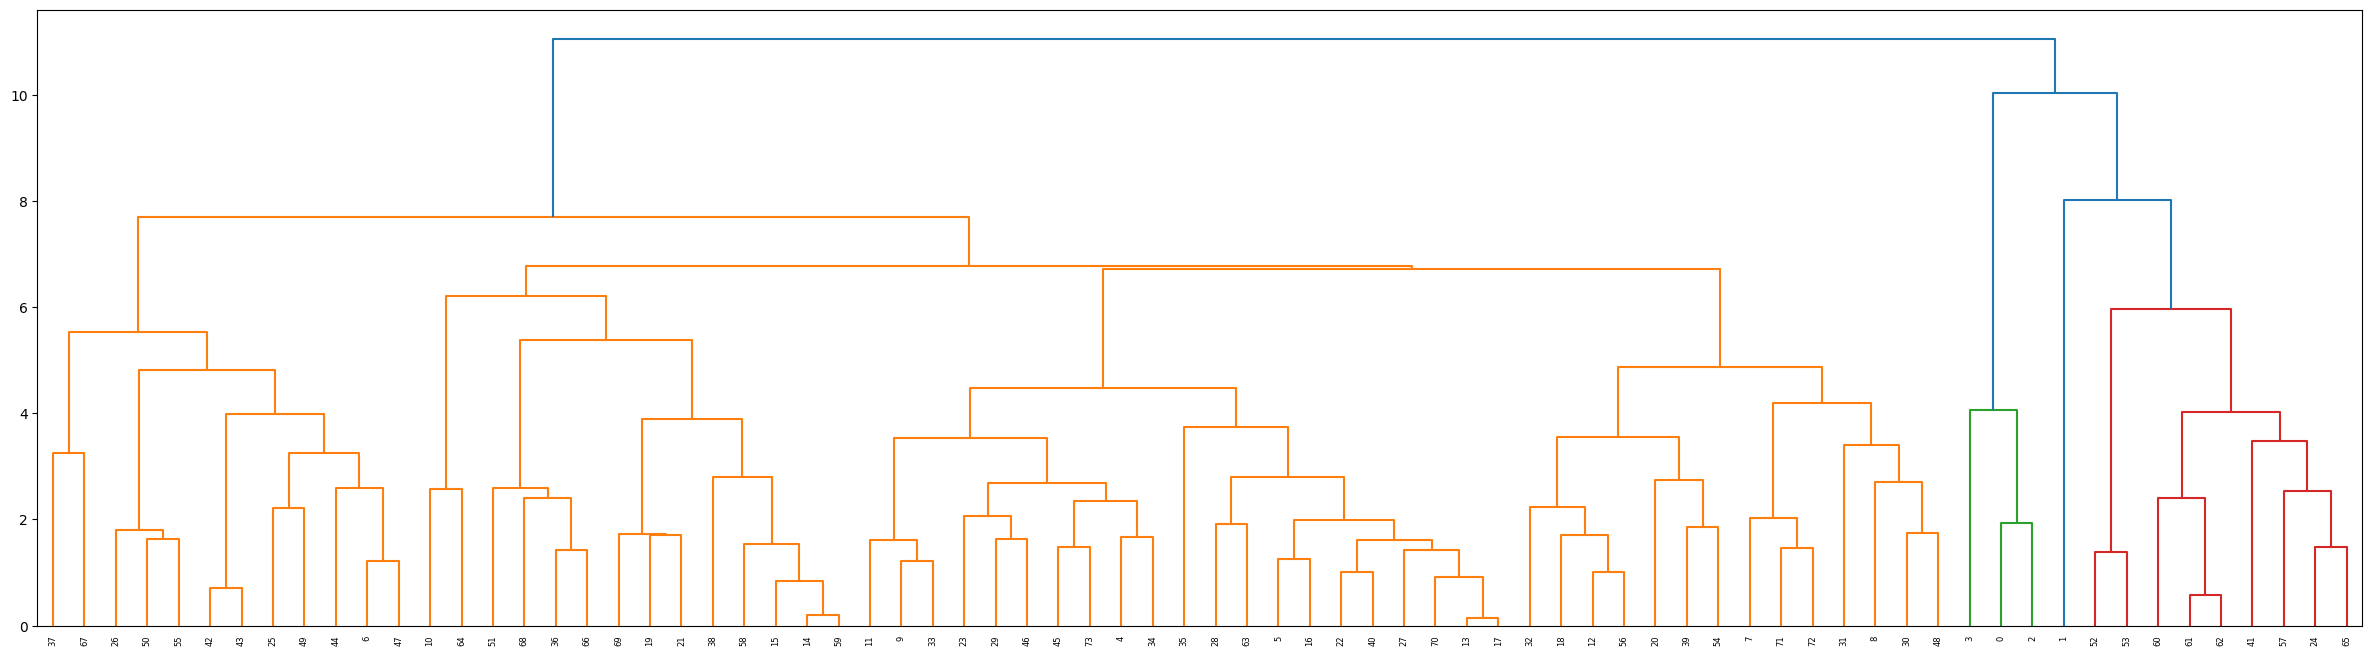

In [287]:
memb = fcluster(linkage(cereal_df_norm,method="complete"),5,criterion="maxclust")
centroids = {}
print("Complete linkage centroids:")
for key, item in cereal_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print("Cluster {}: size {}".format(key,len(item)))
pd.DataFrame(centroids).transpose().round(2)
Z = linkage(cereal_df_norm,method="complete")
plt.figure(figsize=(30,8))
dendrogram(Z)
plt.show()

In answer to question 1, there are similarities between the two methods. Both methods produce a primary cluster and several smaller clusters with smaller sizes. However, the centroid data from a complete linkage cluster analysis seems to provide more stability than the single linkage cluster analysis. We can say this due to there being more spread in the sizes of the clusters. While in complete linkage we see one primary cluster, we also see two other clusters of fair sizes. Looking at single linkage though, we again see one cluster dominating the scene, but the other clusters are not represented by much data within them. 

# Question 2: 
Which method leads to the most insightful or meaningful clusters? Do you think the
analysis will change if you use Euclidean distance?

As answered above, I think a complete linkage would lead to more insightful or meaninful clusters. It would be difficult to gather anything meaninful when the cluster only contains one, two, or three representatives. And while complete linkage also contains a couple clusters with only one and three representatives, the other three clusters contain 49, 12, and 9 records respectively. This leads me to believe a complete linkage cluster analysis would result in more insights begin derived from the data. 
I do not think Euclidean distance would result in a different insight to Manhattan distance. 

# Question 3: 
Choose one of the methods. How many clusters would you use? What distance is
used for this cutoff? (Look at the dendrogram.)

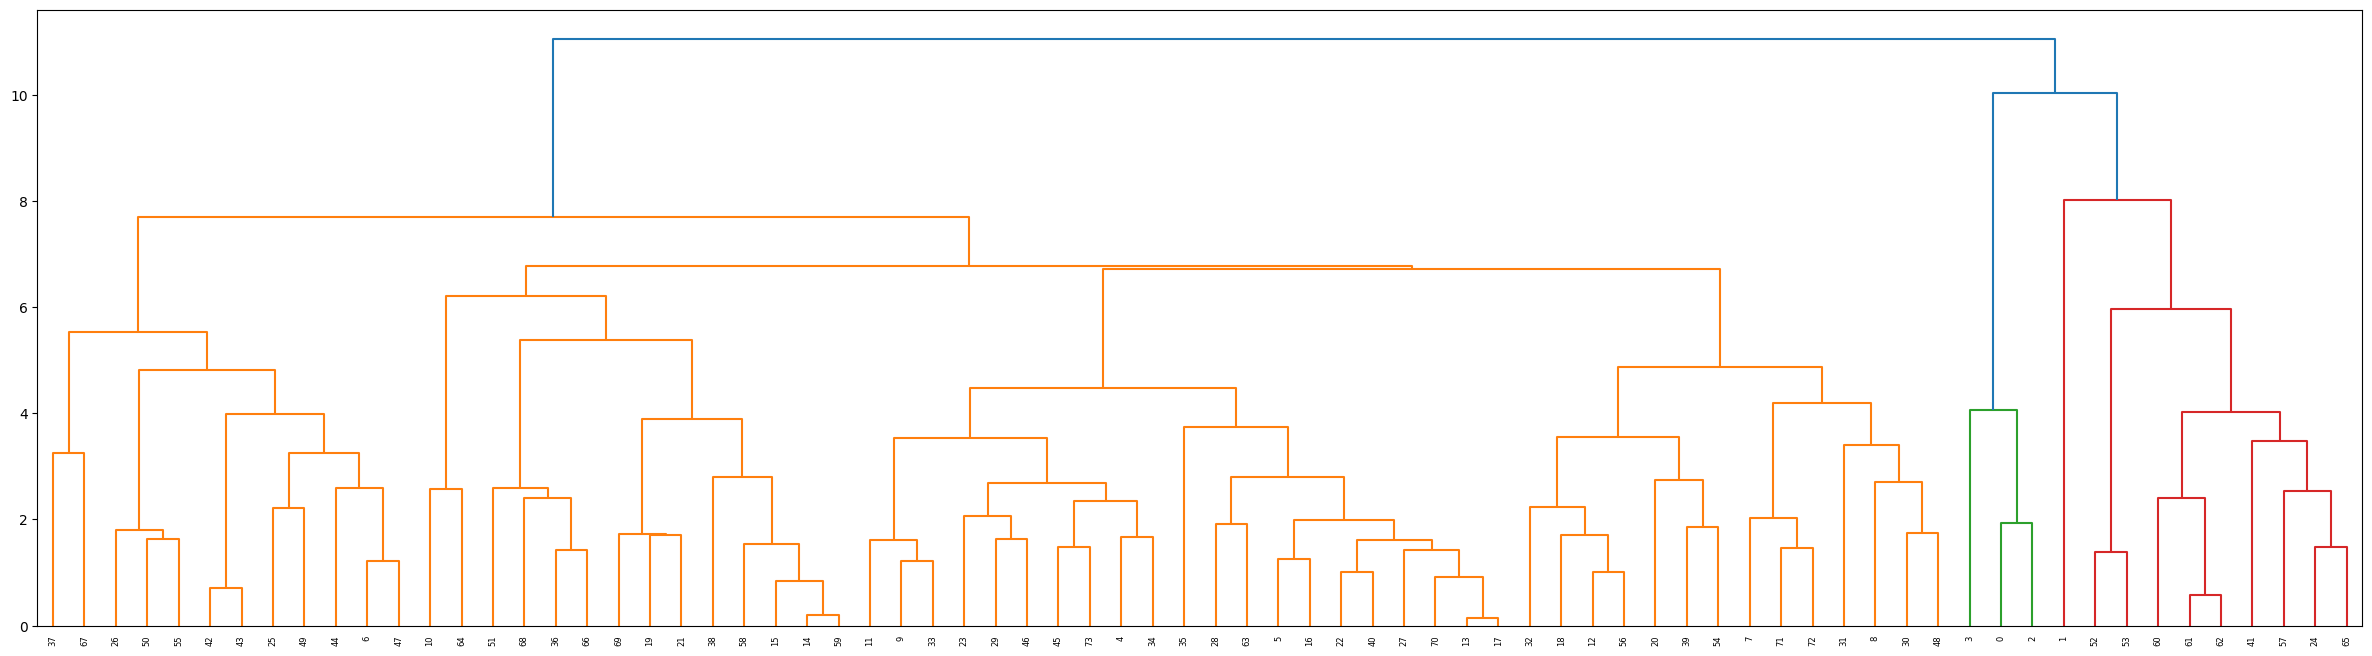

In [294]:
Z = linkage(cereal_df_norm,method="complete")
plt.figure(figsize=(30,8))
dendrogram(Z,color_threshold=10)
plt.show()

Depending on the depth of the analysis and how many clusters would be helpful for conducting such an alaysis, I would either proceed with a distance of 6.5 or 8, which would result in 7 and 5 clusters respectively. Both of these distances would result in a cluster with only one member. If we were not too concerned with losing too much data, we could use a distance of 10, which would give us only three clusters, with the smallest cluster having three members. 

I think I would go with a distance of 8 and use 5 clusters. 

# Question 4: 
The elementary public schools would like to choose a set of cereals to include in
their daily cafeterias. Every day a different cereal is offered, but all cereals should
support a healthy diet. For this goal, you are requested to find a cluster of "healthy
cereals." Should the data be normalized? If not, how should they be used in the
cluster analysis?

In answer to this question, we would want to look at our original dataset to see if any of our features would dominate the metrics and indeed we see sodium, calories, and potassium have a greater scale than our other features, which means they would have a greater impact on our analysis of what was considered healthy. We should normalize the data prior to conducting our cluster analysis for healthy cereals to minimize the impact of these variables on our clusters. 